# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

## Load the Data

In [226]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [228]:
df.shape

(52000, 26)

In [229]:
df.head()
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
31885,361960.0,382110.0,-2.572718,53.334510,7,2.0,2,2.0,17/11/2010,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2.0,Yes,2010
49551,526526.0,405491.0,-0.092553,53.530835,16,3.0,2,1.0,09/08/2014,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,2014
25079,360450.0,392540.0,-2.596702,53.428147,7,3.0,2,1.0,20/02/2012,2,...,3,49,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2012
40599,533280.0,192330.0,-0.076433,51.613977,1,3.0,2,2.0,29/01/2013,3,...,3,406,None within 50 metres,Footbridge or subway,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2013
37121,282080.0,694460.0,-3.898696,56.128302,96,2.0,2,1.0,28/10/2011,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Wet/Damp,2.0,Yes,2011


In [230]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [231]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
51995    False
51996    False
51997    False
51998    False
51999    False
Length: 52000, dtype: bool>

In [232]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [233]:
# Here for remove the outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']
data = remove_outliers(df, numerical_columns)


In [234]:
# Here for Impute missing data
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

categorical_columns = ['Police_Force', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [235]:
# Here to Scale the data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [236]:
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


In [237]:
label_encoder = LabelEncoder()

df['Light_Conditions']= label_encoder.fit_transform(df['Light_Conditions'])
df['Urban_or_Rural_Area']= label_encoder.fit_transform(df['Urban_or_Rural_Area'])
df['Accident_Severity']= label_encoder.fit_transform(df['Accident_Severity'])
df['Road_Type']= label_encoder.fit_transform(df['Road_Type'])
df['Pedestrian_Crossing-Human_Control']= label_encoder.fit_transform(df['Pedestrian_Crossing-Human_Control'])
df['Pedestrian_Crossing-Physical_Facilities']= label_encoder.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])
df['Weather_Conditions ']= label_encoder.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions']= label_encoder.fit_transform(df['Road_Surface_Conditions'])
df['Did_Police_Officer_Attend_Scene_of_Accident']= label_encoder.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])
df['Local_Authority_(Highway)']= label_encoder.fit_transform(df['Local_Authority_(Highway)'])

In [238]:
print(df.isnull().sum())

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [239]:
print(df.columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year',
       'Weather_Conditions '],
      dtype='object')


In [240]:
numerical_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                     'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_columns])
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]
print(df.head())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0               1.264296               -1.214122   1.219030 -1.220820   
1               0.721024               -0.698383   0.712769 -0.697738   
2              -1.322950               -0.810182  -1.290387 -0.806603   
3              -1.036542                0.672210  -1.040316  0.675575   
4              -0.565628                0.311280  -0.554861  0.317403   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                  2           -1.146291             -0.414816   
1             1                  2            0.227620             -0.414816   
2            62                  2            0.227620             -0.414816   
3             4                  2           -1.146291              0.754485   
4            21                  2            0.227620              0.754485   

         Date  Day_of_Week  ...  Pedestrian_Crossing-Physical_Facilities  \
0  2

In [241]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Police_Force', 'Accident_Severity', 'Day_of_Week', 'Road_Type', 'Weather_Conditions']


encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=categorical_columns, inplace=True)
print(df.head())


   Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0               1.264296               -1.214122   1.219030 -1.220820   
1               0.721024               -0.698383   0.712769 -0.697738   
2              -1.322950               -0.810182  -1.290387 -0.806603   
3              -1.036542                0.672210  -1.040316  0.675575   
4              -0.565628                0.311280  -0.554861  0.317403   

   Number_of_Vehicles  Number_of_Casualties        Date  \
0           -1.146291             -0.414816  27/11/2009   
1            0.227620             -0.414816  10/10/2010   
2            0.227620             -0.414816  14/09/2005   
3           -1.146291              0.754485  18/08/2007   
4            0.227620              0.754485  06/08/2013   

   Local_Authority_(District)  Local_Authority_(Highway)  1st_Road_Class  ...  \
0                         556                        130               3  ...   
1                          26               

In [242]:
# Here is to One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_columns)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [243]:
selected_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                      'Number_of_Vehicles', 'Number_of_Casualties',
                     'Speed_limit', 'Road_Surface_Conditions',
                     'Urban_or_Rural_Area', 'PCA1', 'PCA2']

clustering_data = df[selected_features]


In [244]:
df = df.drop('Date', axis=1)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

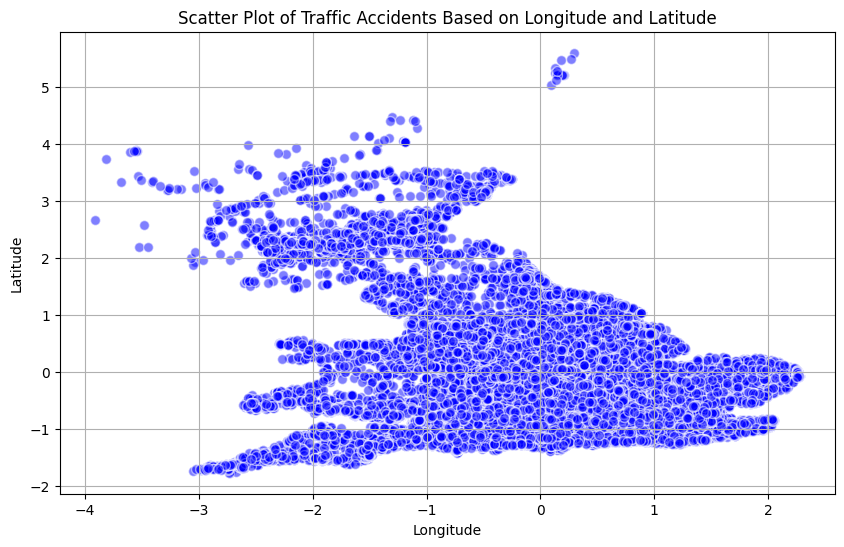

In [245]:
df.columns = df.columns.str.strip()
longitude = df['Longitude']
latitude = df['Latitude']
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Traffic Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [246]:
print(df.columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year',
       'Weather_Conditions', 'PCA1', 'PCA2', 'Police_Force_3',
       'Police_Force_4', 'Police_Force_5', 'Police_Force_6', 'Police_Force_7',
       'Police_Force_10', 'Police_Force_11', 'Police_Force_12',
       'Police_Force_13', 'Police_Force_14', 'Police_Force_16',
       'Police_Force_17', 'Police_Force_20', 'Police_Force_21',
       'Police_Force_22', 'Police_Force_23', 'Police_Force_30',
       'Police_Force_31', 'Police_Force_32', 'Police_Force_33',
       

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 95 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Location_Easting_OSGR                          52000 non-null  float64
 1   Location_Northing_OSGR                         52000 non-null  float64
 2   Longitude                                      52000 non-null  float64
 3   Latitude                                       52000 non-null  float64
 4   Number_of_Vehicles                             52000 non-null  float64
 5   Number_of_Casualties                           52000 non-null  float64
 6   Local_Authority_(District)                     52000 non-null  int64  
 7   Local_Authority_(Highway)                      52000 non-null  int64  
 8   1st_Road_Class                                 52000 non-null  int64  
 9   1st_Road_Number                                520

In [248]:
X = df

In [249]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 4.14940666e-02,  3.10266492e-02,  4.01342109e-02,
         3.04681773e-02, -3.55156176e-03, -9.10605764e-03,
         3.48232387e+02,  1.05395419e+02,  4.14383746e+00,
         2.25097805e+02,  4.45720208e-02,  2.52838897e+00,
         7.69652250e+01,  1.99140394e+00,  2.22545117e+00,
         3.36965494e+00,  1.48162348e+00,  3.73928545e-01,
         8.13743925e-01,  2.00938340e+03,  1.73059171e+00,
        -7.49914184e-03,  6.19848222e-03,  8.62047913e-03,
         2.97198955e-02,  1.89992430e-02,  3.58983125e-02,
         2.10749957e-02,  2.19541381e-02,  9.42635962e-03,
         1.67037046e-02,  3.78763828e-02,  2.02202740e-02,
         2.15634081e-02,  7.64365430e-03,  3.29434174e-02,
         1.99028059e-02,  1.53605705e-02,  7.64365430e-03,
         1.64594984e-02,  1.73142201e-02,  1.80956800e-02,
         8.74258224e-03,  5.59232216e-03,  1.96585997e-02,
         1.60199272e-02,  1.16974773e-02,  1.04276051e-02,
         2.10749957e-02,  3.26992112e-02,  2.72534128e-0

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [251]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.7476423950990131


## Plot the data points with their predicted cluster center

1.   List item
2.   List item



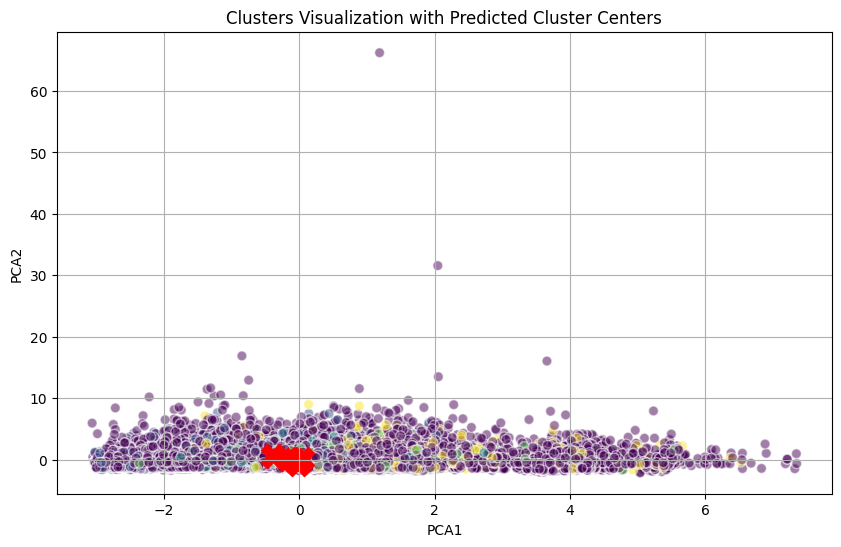

In [252]:
cluster_centers = kmeans.cluster_centers_
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5, edgecolors='w', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X')  # Cluster centers
plt.title('Clusters Visualization with Predicted Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

The features did I choose for clustering
'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                      'Number_of_Vehicles', 'Number_of_Casualties',
                     'Speed_limit', 'Road_Surface_Conditions',
                     'Urban_or_Rural_Area', 'PCA1', 'PCA2'
